<div class="alert alert-success">
    
<h2><center>Hackathon Data Projet</center></h2>
    
<center>"Data Visalization et Machine Learning"</br></center>
<center>|Analysis Jupiter Notebook|</br>
</center></div>

### Import des bibliothèques nécessaires pour la prédiction

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
scaler = StandardScaler()
label_encoder = LabelEncoder()

### Sélection des colonnes nécessaires à la prédiction

In [2]:
column_to_let = ["user_id","product_id","category","subcategory","subsubcategory", "is_view","is_cart","is_purchase","p_views","p_carts","p_purchases","user_views","user_carts","user_purchases"]

In [3]:
data = pd.read_csv("C:\\Hetic\\MD4\\Hackathon\\datasetreco.csv", sep=";")
df= pd.read_csv("C:\\Hetic\\MD4\\Hackathon\\datasetreco.csv", sep=";")[column_to_let]

In [4]:
df["is_purchase"].value_counts()

is_purchase
0    290440
1     15469
Name: count, dtype: int64

In [5]:
df.drop_duplicates()

,user_id,product_id,category,subcategory,subsubcategory,is_view,is_cart,is_purchase,p_views,p_carts,p_purchases,user_views,user_carts,user_purchases
0,1515915625519390366,3828758,electronics,audio,acoustic,1,0,0,372,1,0,1,0,0
1,1515915625519398031,1271549,electronics,audio,acoustic,1,0,0,365,1,0,1,0,0
2,1515915625519407618,124712,electronics,audio,acoustic,1,0,0,513,68,61,2,1,1
4,1515915625519407618,124712,electronics,audio,acoustic,0,1,0,513,68,61,2,1,1
5,1515915625519407618,124712,electronics,audio,acoustic,0,0,1,513,68,61,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305904,1515915625611012647,3506321,computers,peripherals,wifi,1,0,0,151,0,0,1,0,0
305905,1515915625611017316,3721154,computers,peripherals,wifi,1,0,0,427,25,18,1,0,0
305906,1515915625611014848,3698949,computers,peripherals,wifi,1,0,0,12,1,0,2,0,0
305907,1515915625611014848,673347,computers,peripherals,wifi,1,0,0,23,0,0,2,0,0


In [6]:
grouped_sum = df.groupby(["user_id", "product_id"])['is_view'].sum().reset_index()
groups_to_remove = grouped_sum[grouped_sum['is_view'] < 1]
condition = ~df.set_index(["user_id", "product_id"]).index.isin(groups_to_remove.set_index(["user_id", "product_id"]).index)
df = df[condition].reset_index(drop=True)


In [7]:
#Filtrer les données
users_with_purchase = df[df['user_purchases'] == 1]['user_id'].unique()
df = df[(df['is_view'] != 0) | (df['user_id'].isin(users_with_purchase))]

In [8]:
df = df.drop(columns=['user_id', 'product_id'])

### Normalisation des données pour les datasets de train et de prédiction

In [9]:
df['category'] = label_encoder.fit_transform(df['category'])
df['subcategory'] = label_encoder.fit_transform(df['subcategory'])
df['subsubcategory'] = label_encoder.fit_transform(df['subsubcategory'])

In [10]:
data['category'] = label_encoder.fit_transform(data['category'])
data['subcategory'] = label_encoder.fit_transform(data['subcategory'])
data['subsubcategory'] = label_encoder.fit_transform(data['subsubcategory'])

In [11]:
Y = df["is_purchase"]
X = df.drop(["is_purchase"], axis=1)
X_scaled = scaler.fit_transform(X)
df = pd.DataFrame(X_scaled, columns=X.columns)
df['is_purchase'] = Y

### Train Test Split

In [12]:
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=0.2, random_state=3)

In [13]:
from imblearn.over_sampling import SMOTE
	

# Créer un SMOTE oversampler

under_sampler = SMOTE(random_state=42)

# Appliquer SMOTE


In [14]:
x_train_resampled, y_train_resampled = under_sampler.fit_resample(x_train, y_train)
x_test_resample, y_test_resample = under_sampler.fit_resample(x_test, y_test)

In [15]:
print("Distribution des classes avant rééquilibrage :")
print(y_train.value_counts())
print("Distribution des classes après rééquilibrage :")
print(pd.Series(y_train_resampled).value_counts())

Distribution des classes avant rééquilibrage :
is_purchase
0    217660
1      4181
Name: count, dtype: int64
Distribution des classes après rééquilibrage :
is_purchase
0    217660
1    217660
Name: count, dtype: int64


In [16]:
print("Distribution des classes avant rééquilibrage :")
print(y_test.value_counts())
print("Distribution des classes après rééquilibrage :")
print(pd.Series(y_test_resample).value_counts())

Distribution des classes avant rééquilibrage :
is_purchase
0    54478
1      983
Name: count, dtype: int64
Distribution des classes après rééquilibrage :
is_purchase
0    54478
1    54478
Name: count, dtype: int64


### Mise en place de la régression logistique 

In [17]:
log_regression= LogisticRegression()
log_regression.fit(x_train_resampled, y_train_resampled)

C:\Hetic\MD4\Hackathon\hackathon_venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
# La probabilité
y_prob = log_regression.predict_proba(x_test_resample)[:, 1]

In [19]:
fpr, tpr, thresholds = roc_curve(y_test_resample, y_prob)

In [20]:
# Choix du seuil le plus élevé
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

In [21]:
y_prod_optimal = (y_prob >= optimal_threshold).astype(int)

### Les métriques

In [22]:
# Matrice de confusion
matrice_conf= metrics.confusion_matrix(y_test_resample, y_prod_optimal)
matrice_conf

array([[47234,  7244],
       [ 3563, 50915]], dtype=int64)

In [23]:
# Accuracy
print("accuracy : ",metrics.accuracy_score(y_test_resample, y_prod_optimal))

accuracy :  0.9008131722897317


In [24]:
# Recall
print("recall: ",metrics.recall_score(y_test_resample, y_prod_optimal))

recall:  0.9345974521825324


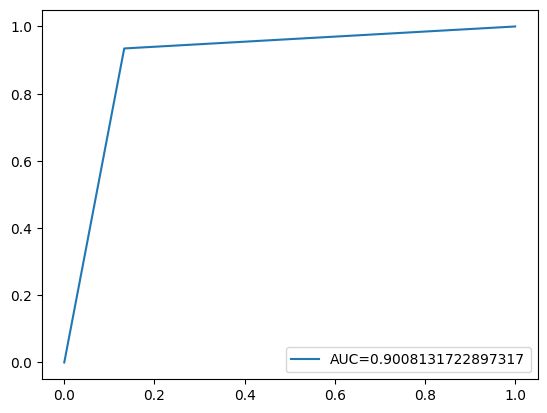

In [25]:
# ROC
y_pred_proba = log_regression.predict_proba(x_test_resample)[::,1]
fpr, tpr, optimal_threshold = metrics.roc_curve(y_test_resample,  y_prod_optimal)
auc = metrics.roc_auc_score(y_test_resample, y_prod_optimal)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

### Fonction appliquée à la régression logistique pour prédir la probabilité

In [26]:
def prediction(user_id, product_id, log_regression, data):
    x_prod = data[(data['user_id'] == int(user_id)) & (data['product_id'] == int(product_id))]
    
    # Sélectionner les colonnes caractéristiques
    X_user = x_prod
    X_user = X_user.drop(["Date","Time","event_type","user_id","product_id","price","is_purchase","user_session"],axis=1)
    
    # Prédire la probabilité
    proba = log_regression.predict_proba(X_user)[:, 1]
    
    return proba[0]

In [27]:
# Utilisation de la fonction 
user_id = 1515915625519390366
product_id = 3828758
probabilité = prediction(user_id, product_id, log_regression, data)
print(f'La Probabilité pour que id {user_id} achete le {product_id}: est de {probabilité}')

La Probabilité pour que id 1515915625519390366 achete le 3828758: est de 0.10091226264169756
